In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt

import torch
# import torchvision
# import torch.nn as nn
from torch.utils.data import DataLoader
# from torchvision.io import read_image
import torchvision.transforms as tvt
# import torch.nn.functional as F

import numpy as np
import time
import pickle
# import os, glob

# User imports
from dataLoader import dataLoader
from model import mynet

In [2]:
def run_code_for_training(net, train_data_loader):
    net = net.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)
    history = []
    for epoch in range(epochs):
        start = time.time()
        running_loss = 0.0
        for i,data in enumerate(train_data_loader):
            (inputs, labels) = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (i + 1) % 500 == 0:
                print("\n[epoch:%d, batch:%5d] loss: %.3f"% (epoch + 1, i + 1, running_loss / float(500)))
                history.append(running_loss/float(500))
                running_loss = 0.0
        print("Estimated time left (hours): %0.2f"% ((time.time()-start)*(epochs-epoch)/3600))
    return history

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

print(device)

batch=64
epochs = 50
dataPath = "../hw04_coco_data/Train"
transform = tvt.Compose([tvt.ToTensor(), tvt.Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))])            
           
dt = dataLoader(dataPath,["refrigerator","airplane","giraffe","cat","elephant","dog","train","horse","boat","truck"],transform)
TrainDataLoader = DataLoader(dataset = dt, batch_size = batch, shuffle = True, num_workers = 16)

net = mynet(1)     
history_net1 = run_code_for_training(net,TrainDataLoader)
torch.save(net, "../saves/net1.pth") 
net = mynet(2)     
history_net2 = run_code_for_training(net,TrainDataLoader)
torch.save(net, "../saves/net2.pth") 
net = mynet(3)     
history_net3 = run_code_for_training(net,TrainDataLoader)
torch.save(net, "../saves/net3.pth") 

cuda:0

[epoch:1, batch:  500] loss: 1.946
Estimated time left (hours): 0.12

[epoch:2, batch:  500] loss: 1.731
Estimated time left (hours): 0.12

[epoch:3, batch:  500] loss: 1.586
Estimated time left (hours): 0.11

[epoch:4, batch:  500] loss: 1.469
Estimated time left (hours): 0.11

[epoch:5, batch:  500] loss: 1.356
Estimated time left (hours): 0.11

[epoch:6, batch:  500] loss: 1.233
Estimated time left (hours): 0.11

[epoch:7, batch:  500] loss: 1.095
Estimated time left (hours): 0.10

[epoch:8, batch:  500] loss: 0.957
Estimated time left (hours): 0.10

[epoch:9, batch:  500] loss: 0.826
Estimated time left (hours): 0.10

[epoch:10, batch:  500] loss: 0.695
Estimated time left (hours): 0.10

[epoch:11, batch:  500] loss: 0.581
Estimated time left (hours): 0.09

[epoch:12, batch:  500] loss: 0.482
Estimated time left (hours): 0.09

[epoch:13, batch:  500] loss: 0.402
Estimated time left (hours): 0.09

[epoch:14, batch:  500] loss: 0.345
Estimated time left (hours): 0.09

[epoch:

# 

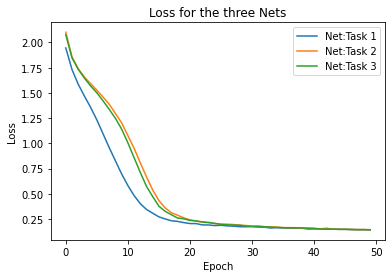

In [4]:
plt.plot(history_net1, label="Net:Task 1")
plt.plot(history_net2, label="Net:Task 2")
plt.plot(history_net3, label="Net:Task 3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss for the three Nets")
plt.legend()
plt.savefig("../saves/train_loss.png")

In [5]:
# save loss history
losses_hist = [history_net1,history_net2,history_net3]
with open("../saves/losses_hist.pickle", 'wb') as f:
    pickle.dump(losses_hist, f)